In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

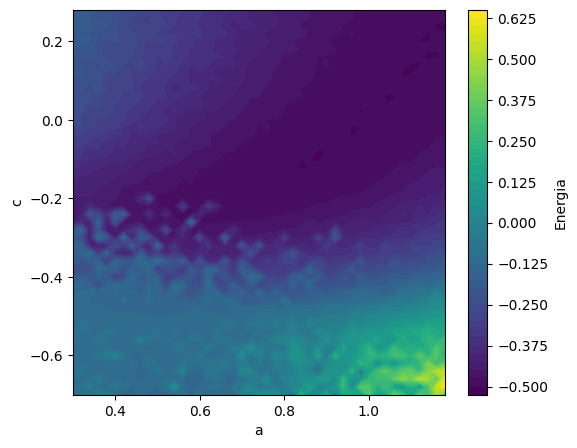

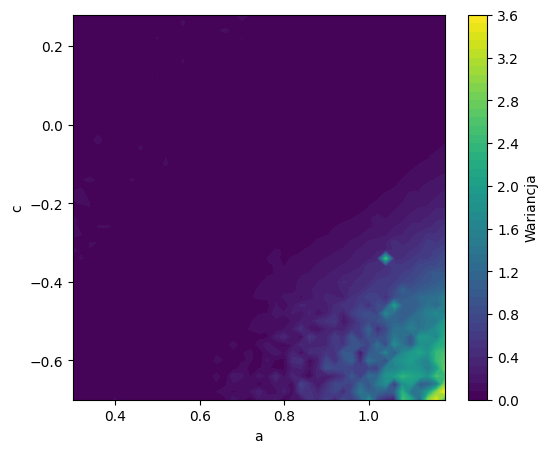

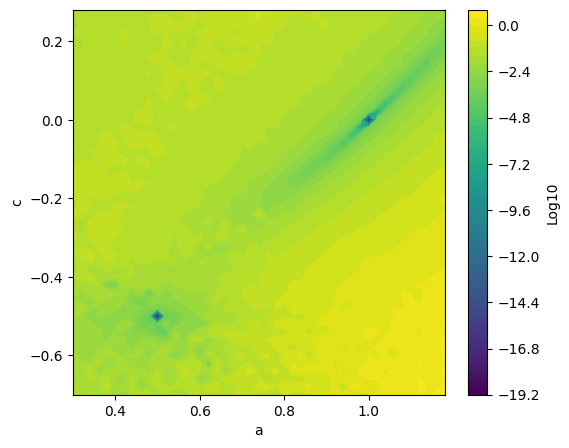

In [ ]:
file = "energy_stat.txt"
data = pd.read_csv(file, sep=" ")
x = data["a"].values
y = data["c"].values
energia = data["średnia_energia"].values
wariancja = data["wariancja"].values
log10 = data["log10"].values
mapy = [energia, wariancja, log10]
nazwy = ["Energia", "Wariancja", "Log10"]
i = 0
xi = np.unique(x)
yi = np.unique(y)
xi, yi = np.meshgrid(xi, yi)

zi = np.full_like(xi, np.nan, dtype=float)
for mapa, nazwa in zip(mapy, nazwy):
    for i in range(len(x)):
        ix = np.where(np.isclose(xi[0], x[i]))[0][0]
        iy = np.where(np.isclose(yi[:,0], y[i]))[0][0]
        zi[iy, ix] = mapa[i]

    plt.figure(figsize=(6, 5))
    plt.contourf(xi, yi, zi, levels=50, cmap='viridis') 
    plt.colorbar(label=f"{nazwa}")
    plt.xlabel('a')
    plt.ylabel('c')
    plt.savefig(f"mapa_{nazwa}.png", dpi=300, bbox_inches='tight')
    plt.show()
    i+=1


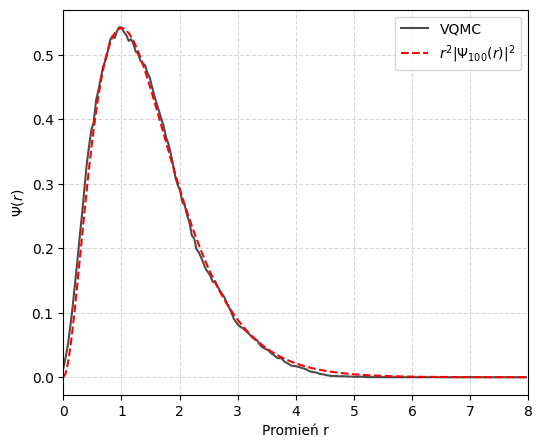

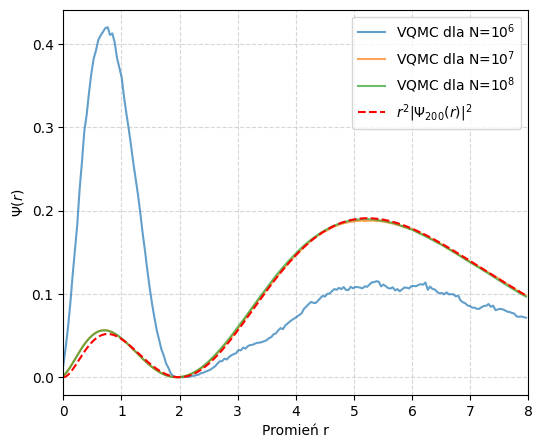

In [32]:
# histogram
pliki = ["histogram_200.txt", "histogram_200_2.txt", "histogram_200_3.txt"]
nazwy = ['histogram_200', 'histogram_200_2', 'histogram_200_3']
# exact
def psi_exact(nazwa, x):
    if(nazwa == 'histogram'):
        return 4*x**2*np.exp(-2*x)
    elif(nazwa == 'histogram_200' or nazwa=='histogram_200_2' or nazwa == 'histogram_200_3'):
        return 1/8*(2-x)**2*x**2*np.exp(-x)

data = pd.read_csv("histogram.txt", sep=" ")
y = data.iloc[:, 0].values
x = np.arange(0, 8, 8/199)
y2 = psi_exact('histogram', x)
plt.figure(figsize=(6, 5))
plt.plot(x, y, color='black', alpha=0.7, label='VQMC')
plt.plot(x, y2, label=r'$r^2|\Psi_{100}(r)|^2$', color='red', linestyle='--')
plt.xlabel('Promień r')
plt.xlim(0, 8)
plt.ylabel(r'$\Psi(r)$')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.savefig("histogram.png", dpi=300, bbox_inches='tight')
plt.show()

N_vals = [r'$10^6$', r'$10^7$', r'$10^8$']
plt.figure(figsize=(6, 5))
for file, n in zip(pliki, N_vals):
    data = pd.read_csv(file, sep=" ")
    y = data.iloc[:, 0].values
    x = np.arange(0, 8, 8/199)
    plt.plot(x, y, alpha=0.7, label=f'VQMC dla N={n}')
    plt.xlabel('Promień r')
    plt.xlim(0, 8)
    plt.ylabel(r'$\Psi(r)$')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.5)
x = np.arange(0, 8, 8/199)
y2 = psi_exact('histogram_200', x)
plt.plot(x, y2, label=r'$r^2|\Psi_{200}(r)|^2$', color='red', linestyle='--')
plt.legend()
plt.savefig(f"histogram_2.png", dpi=300, bbox_inches='tight')
plt.show()